<a href="https://colab.research.google.com/github/PedramDbg/CS-MachineLearning/blob/main/Assignmen_1/prob1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1:**

Suppose that you are conducting a scientific experiment where you are observing the effects of one
variable (x_train.npy and x_test.npy) on the output (y_train.npy and y_test.npy).
Your goal is to come up with a linear regression model that can take the training data (x_train.npy and
y_train.npy) and model the relationship between the variables x and y. You should implement your
own version of linear regression either using gradient descent or normal equations. You SHOULD
NOT use any pre-packaged library such as Sci-Kit Learn.
Here are somethings to keep in mind for tackling this problem:
1. Try to plot this relationship on your own using matplotlib. You can also visualize the test data
to see if it gives you any clues about the underlying relationship between the variables.
2. Use your knowledge gleaned from the previous step to answer the following questions:
a. Is the relationship linear?
b. Do you need feature engineering to add any non-linearity?
i. If so, how can you engineer these features?
ii. What are some functions that you can try?
1. Plot each of them individually to verify!
You will need to write a short report detailing your thought process, the code you wrote in Python to
implement the linear regression model and the equation that models the relationship between x and y
that you found. You should provide evidence that corroborates your final statement such as plots,
prediction errors, etc.

```
# This is formatted as code
```



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def feature_creator(X, n_x, n_sin, n_cos, n_exp):
    n, m = np.shape(X)
    X_transform = np.ones((n, 1))
    if n_x != 0:
      for i in range(1, n_x+1):
          X_transform = np.append(X_transform, np.power(X, i).reshape(-1, 1), axis=1)
    if n_sin != 0:
      for i in range(1, n_sin+1):
          X_transform = np.append(X_transform, np.sin(i*X).reshape(-1, 1), axis=1)
    if n_cos != 0:
      for i in range(1, n_cos+1):
          X_transform = np.append(X_transform, np.cos(i*X).reshape(-1, 1), axis=1)
    if n_exp != 0:
      for i in range(1, n_exp+1):
          X_transform = np.append(X_transform, np.exp(i*X).reshape(-1, 1), axis=1)
    else:
      print('All the inputs are zero')

    X_mean = np.mean(X_transform[:, 1:], axis=0)
    X_std = np.std(X_transform[:, 1:], axis=0)
    
    return X_transform, X_mean, X_std


# normalize the features data
def normalize(X, X_mean, X_std):
    X[:, 1:] = (X[:, 1:] - X_mean) / X_std
    return X


# calculate the cost
def cost_function(x, y, W):
    return ((np.matmul(x, W)-y).T@(np.matmul(x, W)-y))/(2*y.shape[0])


# calculate the weights and the cost function vectors
def fit_data(X_normal, Y, n_x, n_sin, n_cos, n_exp, lr, epochs):
    n, m = X_normal.shape
    W = np.zeros(n_x + n_sin + n_cos+ n_exp + 1)


    cost_fun_vector = []
    for _ in range(epochs):
        func = np.matmul(X_transform, W)     # gradient descent 
        error = func - Y

        W = W - lr * (1 / n) * np.dot(X_normal.T, error)
        cost_fun_vector.append(cost_function(X_normal, Y, W))

    return cost_fun_vector, W


# predict using the trained model parameters
def predict(X_normal, W):	
    n = X_normal.shape[0]
    
    return np.matmul(X_normal, W)

In [ ]:
# import training set
from google.colab import drive
drive.mount('/content/drive')

# local location of the file.
path_Xtrain="/content/drive/My Drive/Machine_Learning/Assignments/assignment_1/x_train.npy"
path_Ytrain="/content/drive/My Drive/Machine_Learning/Assignments/assignment_1/y_train.npy"
path_Xtest="/content/drive/My Drive/Machine_Learning/Assignments/assignment_1/x_test.npy"
path_Ytest="/content/drive/My Drive/Machine_Learning/Assignments/assignment_1/y_test.npy"

# load data
xtrain = np.load(path_Xtrain)
ytrain = np.load(path_Ytrain)
xtest = np.load(path_Xtest)
ytest = np.load(path_Ytest)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Answer-Problem 1, part 1

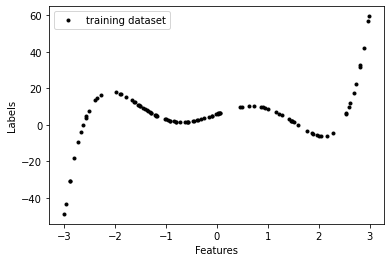

In [ ]:
# plot the given training dataset
plt.plot(xtrain, ytrain, '.', color = 'k', label="training dataset")
plt.xlabel('Features')
plt.ylabel('Labels')
plt.legend(loc="upper left")


Answer-Problem 1, part 2
a) It seems that the relationship between the feature(X) and the label(Y) is not linear. 
b) Yes, we need feature engineering. We are going to create new features from the only given feature and apply the new features in a feature *engineering* context.
b-i) Many different non-linear functions (sin, cos, exp, ...) can be applied for the purpose of feature engineering.
b-ii) We can also say that the relationship between X and Y may be sinusoidal as the X_test - Y_test plotting shows.


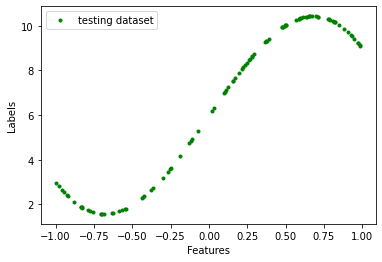

In [ ]:
# plot the given testing dataset
plt.plot(xtest, ytest, '.', color = 'g', label="testing dataset")
plt.xlabel('Features')
plt.ylabel('Labels')
plt.legend(loc="upper left")

Answer-Problem 1, part 3

We can create other basis functions of $x$. Some of other non-linear basis functions are as follows: $cos(\alpha x)$, $exp(\alpha x)$.

In the following code we can define different values for "n_x", "n_sin", "n_cos" and "n_exp".
Here, we have $n_x=4$, $n_{sin}=6$, $n_{cos}=3$ and $n_{exp}=2$. Therefore, we have the following basis functions: $x^1$, $x^2$, $x^3$, $x^4$, $sin(x)$, $sin(2x)$, $sin(3x)$, $sin(4x)$, $sin(5x)$ and $sin(6x)$, $cos(x)$, $cos(2x)$, $cos(3x)$, $exp(x)$ and $exp(2x)$.
We can increase the number of each type of basis function step by step and compare the prediction results. 

Weights:  [  5.60573724   2.0685613   -8.01211967  16.9645568  -14.6408991
  13.3101753   -3.82897221  -4.24692255  -0.33508378   0.35607111
   2.69139258   2.68962282   1.7546492 ]


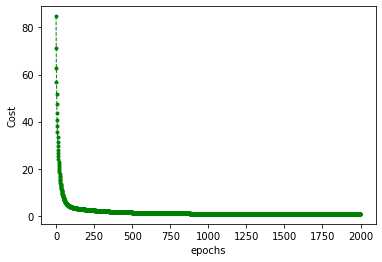

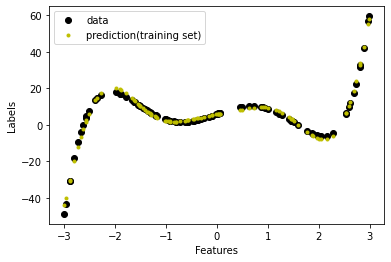

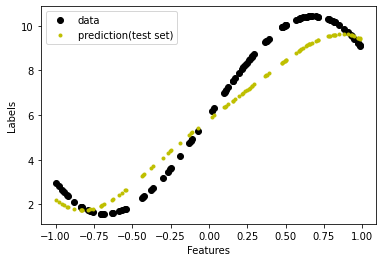

In [ ]:
# define parameters
n_x = 3 # number of polynomial basis functions: x^i ; i=[1,n_x]
n_sin = 3 # number of sin basis functions: sin(ix) ; i=[1, n_sin]
n_cos = 3 # number of cos basis functions: cos(ix) ; i=[1, n_cos]
n_exp = 3 # number of exp basis functions: exp(ix) ; i=[1, n_exp]
lr = 0.1 # learning rate
epochs = 2000 # number of epochs

# create reqired features
X_transform, X_mean, X_std = feature_creator(xtrain, n_x, n_sin, n_cos, n_exp)
X_transform_test, _, _ = feature_creator(xtest, n_x, n_sin, n_cos, n_exp)

# normalize the data
X_normal = normalize(X_transform, X_mean, X_std)
X_normal_test = normalize(X_transform_test, X_mean, X_std)

# create a vector of cost functions resulting from each epoch
cost_fun_vector, W = fit_data(X_normal, ytrain, n_x, n_sin, n_cos, n_exp, lr, epochs)

# predict 
Ytrain_pred = predict(X_normal, W)
Ytest_pred = predict(X_normal_test, W)

# plot cost function vector vs epochs
plt.figure(1)
print("Weights: ", W)
plt.plot(range(epochs), cost_fun_vector, color='green', marker='.', linestyle='dashed', linewidth = "1")
plt.xlabel('epochs')
plt.ylabel('Cost')

# plot training set prediction
plt.figure(2)
plt.plot(xtrain, ytrain, 'o', color = 'k', label="data")
plt.plot(xtrain, Ytrain_pred, '.', color = 'y', label="prediction(training set)")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.legend(loc="upper left")

# plot testing set prediction
plt.figure(3)
plt.plot(xtest, ytest, 'o', color = 'k', label="data")
plt.plot(xtest, Ytest_pred, '.', color = 'y', label="prediction(test set)")
plt.xlabel('Features')
plt.ylabel('Labels')
plt.legend(loc="upper left")


In [ ]:
print(X_transform.shape)

(100, 3)


Here is another version of the above model using different number of introduced bais functions. In this case no polynomial basis function is used. 
We can see the difference between results when we had 2 polynomial basis functions and when we don't have any!
The difference is observable either in the case of training and testing sets. 

Weights:  [  5.60573724 -14.6157467   11.95176004  -3.28736694   0.48605816
   0.56497733  -0.58461293  14.17360348  -6.71098925   2.99729942
  20.36323517   8.07518929]


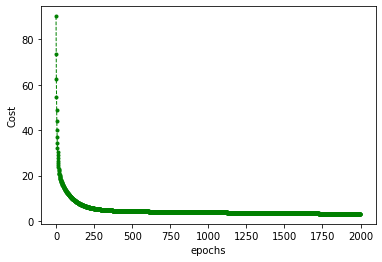

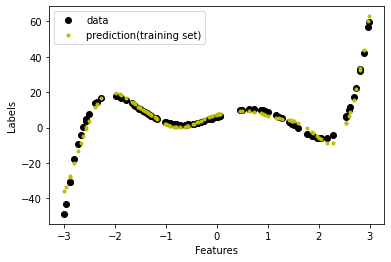

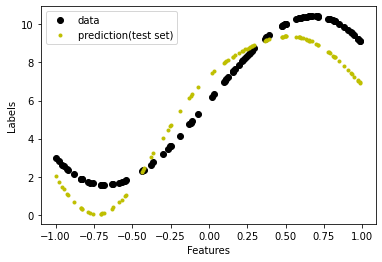

In [ ]:
# define parameters
n_x = 0 # number of polynomial basis functions: x^i ; i=[1,n_x]
n_sin = 6 # number of sin basis functions: sin(ix) ; i=[1, n_sin]
n_cos = 3 # number of cos basis functions: cos(ix) ; i=[1, n_cos]
n_exp = 2 # number of exp basis functions: exp(ix) ; i=[1, n_exp]
lr = 0.1 # learning rate
epochs = 2000 # number of epochs

# create reqired features
X_transform, X_mean, X_std = feature_creator(xtrain, n_x, n_sin, n_cos, n_exp)
X_transform_test, _, _ = feature_creator(xtest, n_x, n_sin, n_cos, n_exp)

# normalize the data
X_normal = normalize(X_transform, X_mean, X_std)
X_normal_test = normalize(X_transform_test, X_mean, X_std)

# create a vector of cost functions resulting from each epoch
cost_fun_vector, W = fit_data(X_normal, ytrain, n_x, n_sin, n_cos, n_exp, lr, epochs)

# predict 
Ytrain_pred = predict(X_normal, W)
Ytest_pred = predict(X_normal_test, W)

# plot cost function vector vs epochs
plt.figure(1)
print("Weights: ", W)
plt.plot(range(epochs), cost_fun_vector, color='green', marker='.', linestyle='dashed', linewidth = "1")
plt.xlabel('epochs')
plt.ylabel('Cost')

# plot training set prediction
plt.figure(2)
plt.plot(xtrain, ytrain, 'o', color = 'k', label="data")
plt.plot(xtrain, Ytrain_pred, '.', color = 'y', label="prediction(training set)")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.legend(loc="upper left")

# plot testing set prediction
plt.figure(3)
plt.plot(xtest, ytest, 'o', color = 'k', label="data")
plt.plot(xtest, Ytest_pred, '.', color = 'y', label="prediction(test set)")
plt.xlabel('Features')
plt.ylabel('Labels')
plt.legend(loc="upper left")


Plot them individually to verify!

Using only polynomail basis functions.



All the inputs are zero
All the inputs are zero
Weights:  [ 5.60573724e+00  4.94259624e+00  1.02927724e+00 -2.52737113e+01
 -7.56380640e-01 -1.57703412e+00 -5.82964861e-01  1.10114920e+01
 -3.22192705e-03  1.38477885e+01  3.01667944e-01  1.16056234e+01
  3.36220162e-01  7.10712241e+00  2.25305733e-01  1.81841523e+00
  6.28207492e-02 -3.53653009e+00 -1.01199411e-01 -8.61872873e+00
 -2.45430810e-01]


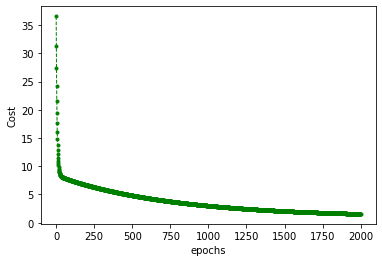

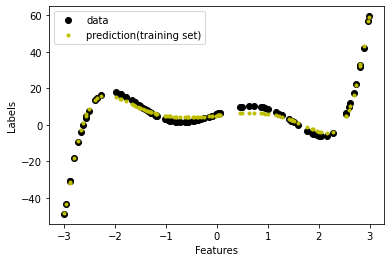

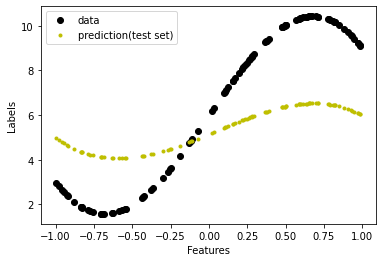

In [ ]:
# define parameters
n_x = 20 # number of polynomial basis functions: x^i ; i=[1,n_x]
n_sin = 0 # number of sin basis functions: sin(ix) ; i=[1, n_sin]
n_cos = 0 # number of cos basis functions: cos(ix) ; i=[1, n_cos]
n_exp = 0 # number of exp basis functions: exp(ix) ; i=[1, n_exp]
lr = 0.1 # learning rate
epochs = 2000 # number of epochs

# create reqired features
X_transform, X_mean, X_std = feature_creator(xtrain, n_x, n_sin, n_cos, n_exp)
X_transform_test, _, _ = feature_creator(xtest, n_x, n_sin, n_cos, n_exp)

# normalize the data
X_normal = normalize(X_transform, X_mean, X_std)
X_normal_test = normalize(X_transform_test, X_mean, X_std)

# create a vector of cost functions resulting from each epoch
cost_fun_vector, W = fit_data(X_normal, ytrain, n_x, n_sin, n_cos, n_exp, lr, epochs)

# predict 
Ytrain_pred = predict(X_normal, W)
Ytest_pred = predict(X_normal_test, W)

# plot cost function vector vs epochs
plt.figure(1)
print("Weights: ", W)
plt.plot(range(epochs), cost_fun_vector, color='green', marker='.', linestyle='dashed', linewidth = "1")
plt.xlabel('epochs')
plt.ylabel('Cost')

# plot training set prediction
plt.figure(2)
plt.plot(xtrain, ytrain, 'o', color = 'k', label="data")
plt.plot(xtrain, Ytrain_pred, '.', color = 'y', label="prediction(training set)")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.legend(loc="upper left")

# plot testing set prediction
plt.figure(3)
plt.plot(xtest, ytest, 'o', color = 'k', label="data")
plt.plot(xtest, Ytest_pred, '.', color = 'y', label="prediction(test set)")
plt.xlabel('Features')
plt.ylabel('Labels')
plt.legend(loc="upper left")


Plot them individually to verify!

Using only sinus basis functions.

All the inputs are zero
All the inputs are zero
Weights:  [ 5.60573724 -1.41720322  1.15033156  6.17964492 -6.48126098  5.75665335
 -4.94866696  4.25127934 -3.65841991  3.45871384 -2.66535378  2.36152137
 -2.06637584  1.7295133  -1.51854681  1.21908557 -0.96182748  0.81601906
 -0.75274833  0.54838439 -0.41648846]


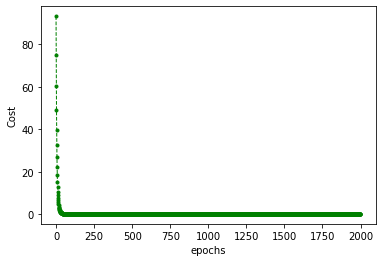

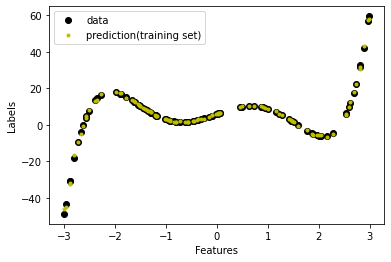

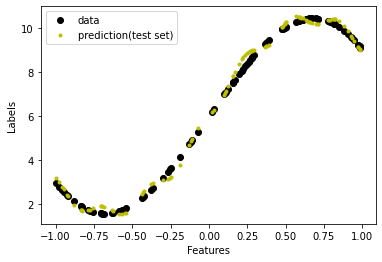

In [ ]:
# define parameters
n_x = 0 # number of polynomial basis functions: x^i ; i=[1,n_x]
n_sin = 20 # number of sin basis functions: sin(ix) ; i=[1, n_sin]
n_cos = 0 # number of cos basis functions: cos(ix) ; i=[1, n_cos]
n_exp = 0 # number of exp basis functions: exp(ix) ; i=[1, n_exp]
lr = 0.1 # learning rate
epochs = 2000 # number of epochs

# create reqired features
X_transform, X_mean, X_std = feature_creator(xtrain, n_x, n_sin, n_cos, n_exp)
X_transform_test, _, _ = feature_creator(xtest, n_x, n_sin, n_cos, n_exp)

# normalize the data
X_normal = normalize(X_transform, X_mean, X_std)
X_normal_test = normalize(X_transform_test, X_mean, X_std)

# create a vector of cost functions resulting from each epoch
cost_fun_vector, W = fit_data(X_normal, ytrain, n_x, n_sin, n_cos, n_exp, lr, epochs)

# predict 
Ytrain_pred = predict(X_normal, W)
Ytest_pred = predict(X_normal_test, W)

# plot cost function vector vs epochs
plt.figure(1)
print("Weights: ", W)
plt.plot(range(epochs), cost_fun_vector, color='green', marker='.', linestyle='dashed', linewidth = "1")
plt.xlabel('epochs')
plt.ylabel('Cost')

# plot training set prediction
plt.figure(2)
plt.plot(xtrain, ytrain, 'o', color = 'k', label="data")
plt.plot(xtrain, Ytrain_pred, '.', color = 'y', label="prediction(training set)")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.legend(loc="upper left")

# plot testing set prediction
plt.figure(3)
plt.plot(xtest, ytest, 'o', color = 'k', label="data")
plt.plot(xtest, Ytest_pred, '.', color = 'y', label="prediction(test set)")
plt.xlabel('Features')
plt.ylabel('Labels')
plt.legend(loc="upper left")

Plot them individually to verify!

Using only cosine basis functions.

All the inputs are zero
All the inputs are zero
Weights:  [ 5.60573724 -1.9877608   1.48441032 -1.94040459  1.68767416 -0.10563463
 -0.47623634 -0.64201478  2.47477701 -2.42524006  2.12480128 -0.58032233
  0.13516366 -0.21112405  1.27983513 -1.57921877  2.30621495 -1.79777801
  0.8653599  -0.42534482  0.84938214]


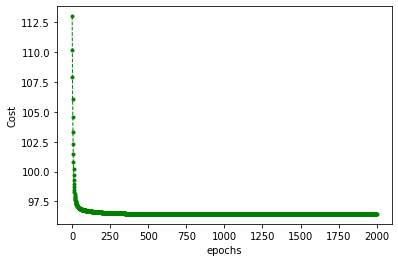

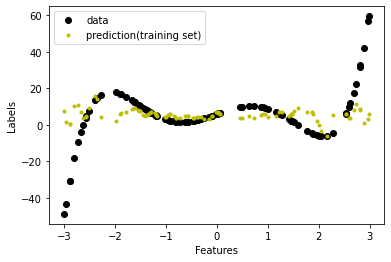

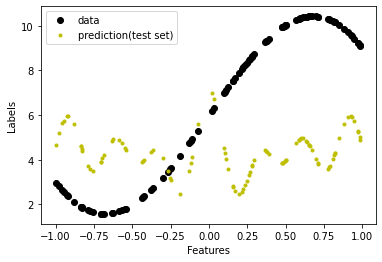

In [ ]:
# define parameters
n_x = 0 # number of polynomial basis functions: x^i ; i=[1,n_x]
n_sin = 0 # number of sin basis functions: sin(ix) ; i=[1, n_sin]
n_cos = 20 # number of cos basis functions: cos(ix) ; i=[1, n_cos]
n_exp = 0 # number of exp basis functions: exp(ix) ; i=[1, n_exp]
lr = 0.1 # learning rate
epochs = 2000 # number of epochs

# create reqired features
X_transform, X_mean, X_std = feature_creator(xtrain, n_x, n_sin, n_cos, n_exp)
X_transform_test, _, _ = feature_creator(xtest, n_x, n_sin, n_cos, n_exp)

# normalize the data
X_normal = normalize(X_transform, X_mean, X_std)
X_normal_test = normalize(X_transform_test, X_mean, X_std)

# create a vector of cost functions resulting from each epoch
cost_fun_vector, W = fit_data(X_normal, ytrain, n_x, n_sin, n_cos, n_exp, lr, epochs)

# predict 
Ytrain_pred = predict(X_normal, W)
Ytest_pred = predict(X_normal_test, W)

# plot cost function vector vs epochs
plt.figure(1)
print("Weights: ", W)
plt.plot(range(epochs), cost_fun_vector, color='green', marker='.', linestyle='dashed', linewidth = "1")
plt.xlabel('epochs')
plt.ylabel('Cost')

# plot training set prediction
plt.figure(2)
plt.plot(xtrain, ytrain, 'o', color = 'k', label="data")
plt.plot(xtrain, Ytrain_pred, '.', color = 'y', label="prediction(training set)")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.legend(loc="upper left")

# plot testing set prediction
plt.figure(3)
plt.plot(xtest, ytest, 'o', color = 'k', label="data")
plt.plot(xtest, Ytest_pred, '.', color = 'y', label="prediction(test set)")
plt.xlabel('Features')
plt.ylabel('Labels')
plt.legend(loc="upper left")

Plot them individually to verify!

Using only exponential basis functions.

Weights:  [ 5.60573724  0.10227063 -9.97244293  3.17134786  7.88872568  7.39314224
  5.12707963  2.72243457  0.76641442 -0.61558956 -1.47270811 -1.90457311
 -2.01270555 -1.88420304 -1.58844338 -1.1785526  -0.6942393  -0.16467838
  0.38900028  0.95171048  1.51285773]


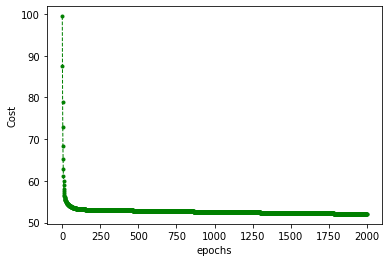

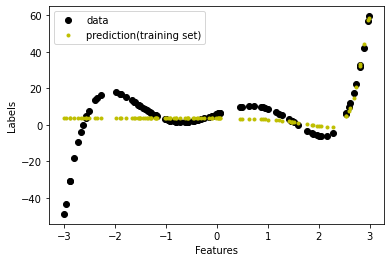

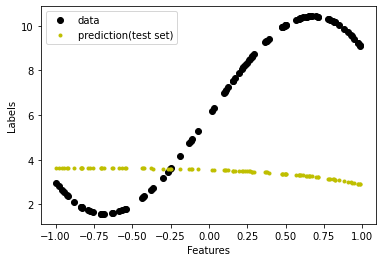

In [ ]:
# define parameters
n_x = 0 # number of polynomial basis functions: x^i ; i=[1,n_x]
n_sin = 0 # number of sin basis functions: sin(ix) ; i=[1, n_sin]
n_cos = 0 # number of cos basis functions: cos(ix) ; i=[1, n_cos]
n_exp = 20 # number of exp basis functions: exp(ix) ; i=[1, n_exp]
lr = 0.1 # learning rate
epochs = 2000 # number of epochs

# create reqired features
X_transform, X_mean, X_std = feature_creator(xtrain, n_x, n_sin, n_cos, n_exp)
X_transform_test, _, _ = feature_creator(xtest, n_x, n_sin, n_cos, n_exp)

# normalize the data
X_normal = normalize(X_transform, X_mean, X_std)
X_normal_test = normalize(X_transform_test, X_mean, X_std)

# create a vector of cost functions resulting from each epoch
cost_fun_vector, W = fit_data(X_normal, ytrain, n_x, n_sin, n_cos, n_exp, lr, epochs)

# predict 
Ytrain_pred = predict(X_normal, W)
Ytest_pred = predict(X_normal_test, W)

# plot cost function vector vs epochs
plt.figure(1)
print("Weights: ", W)
plt.plot(range(epochs), cost_fun_vector, color='green', marker='.', linestyle='dashed', linewidth = "1")
plt.xlabel('epochs')
plt.ylabel('Cost')

# plot training set prediction
plt.figure(2)
plt.plot(xtrain, ytrain, 'o', color = 'k', label="data")
plt.plot(xtrain, Ytrain_pred, '.', color = 'y', label="prediction(training set)")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.legend(loc="upper left")

# plot testing set prediction
plt.figure(3)
plt.plot(xtest, ytest, 'o', color = 'k', label="data")
plt.plot(xtest, Ytest_pred, '.', color = 'y', label="prediction(test set)")
plt.xlabel('Features')
plt.ylabel('Labels')
plt.legend(loc="upper left")

We can conclude that the best basis functions among all are polynomials and sinusoidal bases.